In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
#abspath = os.path.abspath(__file__)
#dname = os.path.dirname(abspath)
#os.chdir(dname)


In [2]:
def load_data(name):
    labels = []
    images = []
    with open(name, 'r') as f:
        for row in f:
            row = row.strip().split(' ')
            row=np.array(row).astype(float)
            #print(row.shape)
            
            label=row[0]
            image = row[1:]
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

def featExtrct(name):

    images, labels = load_data(name)
    images = images.reshape(-1, 16, 16)
    #images = (images+1)/2 #mapping from 0 to 255

    indselect = (labels == 1) | (labels == 5)
    images = images[indselect]
    labels = labels[indselect] 
    # Extract feature

    #intensity
    inten = images.reshape(-1, 16*16).mean(axis=-1)

    #symmetry
    
    symall=[]
    for i in range(len(images)):
        sym1 = np.abs(np.fliplr(images[i]) - images[i]) +np.abs(np.flipud(images[i]) - images[i])
    
        symall.append(sym1)
    symall=np.array(symall)
    print(symall.shape) 
    sym=np.array(symall.reshape(len(images),-1).mean(axis=-1))
    print('sym shape') 

    #plotting features
    i1 = (labels == 1)
    i5 = (labels == 5)
    labels = np.zeros(len(labels))
    labels[i1] = 1
    labels[i5] = -1    
    
    featvector = np.concatenate((inten[:, None], sym[:, None]), axis=1)      

    plt.figure()
    plt.scatter(inten[i1], sym[i1], c='b', marker='o', label='digit 1 feature')
    plt.scatter(inten[i5], sym[i5], c='r', marker='x', label='digit 5 feature')
    plt.legend()
    plt.xlabel('Intensity')
    plt.ylabel('Vertical Symmetry')
    plt.title('For the file named:'+name)
    plt.show()

    
    
    return featvector, labels

    

(1561, 16, 16)
sym shape


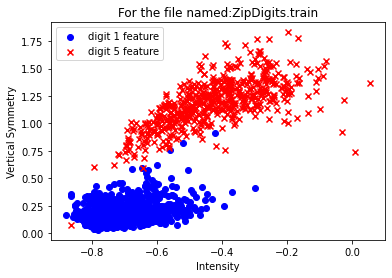

(424, 16, 16)
sym shape


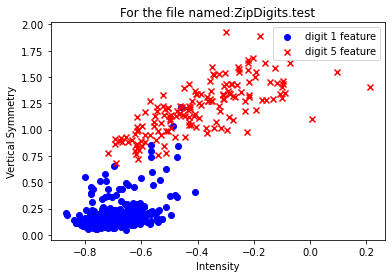

In [3]:
trainfile = 'ZipDigits.train'
testfile = 'ZipDigits.test'
#Data collect
traindata, trainlabel= featExtrct(trainfile)
testdata, testlabel=featExtrct(testfile)

#Padded with 1
trDataPadded = np.concatenate((np.ones((len(traindata), 1)), traindata), axis=1)
tsDataPadded= np.concatenate((np.ones((len(testdata), 1)), testdata), axis=1)

In [4]:
#Logistic Regression

w=np.zeros(len(trDataPadded[1]))
iter = 1000
eta = 5

E_in = np.mean(np.log(1+np.exp(-trainlabel * np.dot(trDataPadded, w))))
E_out = np.mean(np.log(1+np.exp(-testlabel * np.dot(tsDataPadded, w))))


for i in range(iter):    

    #gradient calculation
    gradsum=0
    for al in range(len(trDataPadded)):
        grad1=np.divide((-trainlabel[al] * trDataPadded[al] ),
        (1 + np.exp(trainlabel[al] * np.dot(trDataPadded[al], w))))
        gradsum+=grad1
    grad=gradsum/len(traindata)
    

    w = w - eta * grad 
    E_in = np.mean(np.log(1+np.exp(-trainlabel * np.dot(trDataPadded, w))))
    E_out = np.mean(np.log(1+np.exp(-testlabel * np.dot(tsDataPadded, w))))
    

    

w_linear = w #Weight of linear regression

print('for logistic regression')
print(f'E_in: {E_in}')
print(f'E_out: {E_out}')







for logistic regression
E_in: 0.022411150826830834
E_out: 0.0820101347773515


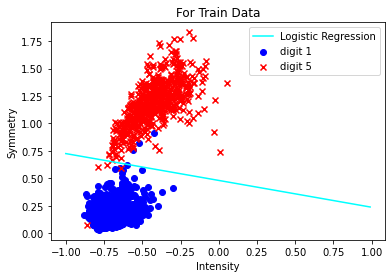

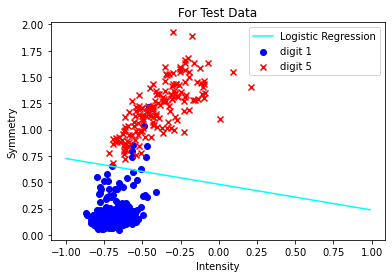

In [5]:
# plot separator

x_lin = np.arange(-1, 1, 0.01)
y_lin = -(w[0] + w[1] * x_lin) / w[2]

plt.figure()

plt.scatter(traindata[:,0][trainlabel==1], traindata[:,1][trainlabel==1], c='b', marker='o', label='digit 1')
plt.scatter(traindata[:,0][trainlabel==-1], traindata[:,1][trainlabel==-1], c='r', marker='x', label='digit 5')
plt.plot(x_lin, y_lin, c='cyan', label='Logistic Regression')
plt.legend()
plt.xlabel('Intensity')
plt.ylabel('Symmetry')
plt.title('For Train Data')
plt.show()


plt.figure()

plt.scatter(testdata[:,0][testlabel==1], testdata[:,1][testlabel==1], c='b', marker='o', label='digit 1')
plt.scatter(testdata[:,0][testlabel==-1], testdata[:,1][testlabel==-1], c='r', marker='x', label='digit 5')
plt.plot(x_lin, y_lin, c='cyan', label='Logistic Regression')
plt.legend()
plt.xlabel('Intensity')
plt.ylabel('Symmetry')
plt.title('For Test Data')
plt.show()

In [6]:
#Polynomial

def getnewfeature(featurevector):
    x1 = featurevector[:, [0]]
    x2 = featurevector[:, [1]]
    newvector = np.concatenate((x1, x2, x1**2, x2**2, x1 * x2, x1**3, x2**3, x1**2 * x2,
                   x1 * x2**2), axis=1)
    return newvector
newTrainFeat=getnewfeature(traindata)
newTestFeat=getnewfeature(testdata)

trDataPadded = np.concatenate((np.ones((len(traindata), 1)), newTrainFeat), axis=1)
tsDataPadded= np.concatenate((np.ones((len(testdata), 1)), newTestFeat), axis=1)

w=np.zeros(len(trDataPadded[1]))

#Logistic Regression

iter = 1000
eta = 5

list_Ein = []
list_Eout = []

E_in = np.mean(np.log(1+np.exp(-trainlabel * np.dot(trDataPadded, w))))
E_out = np.mean(np.log(1+np.exp(-testlabel * np.dot(tsDataPadded, w))))


for i in range(iter):
    

    #gradient calculate
    gradsum=0
    for al in range(len(trDataPadded)):
        grad1=np.divide((-trainlabel[al] * trDataPadded[al] ),
        (1 + np.exp(trainlabel[al] * np.dot(trDataPadded[al], w))))
        gradsum+=grad1
    grad=gradsum/len(traindata)
    

    w = w - eta * grad 
    E_in = np.mean(np.log(1+np.exp(-trainlabel * np.dot(trDataPadded, w))))
    E_out = np.mean(np.log(1+np.exp(-testlabel * np.dot(tsDataPadded, w))))
    

    

w_poly = w

print('for polynomial')
print('E_in: '+str(E_in))
print('E_out: '+str(E_out))








for polynomial
E_in: 0.018863676956163634
E_out: 0.09581696998789499


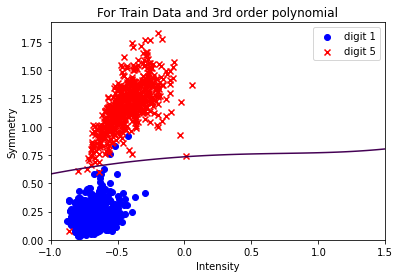

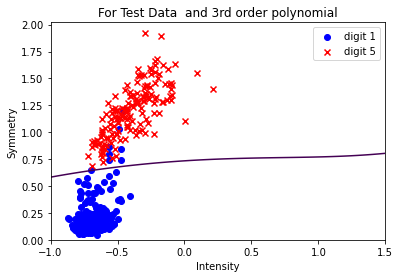

In [7]:



x_pol = np.linspace(-1,1.5,200)
#np.arange(-2, 2, 0.02)
y_pol= np.linspace(0,1,200)
np.arange(0, 2, 0.01)

z=np.zeros((len(x_pol),len(y_pol)))


#(1, x1, x2, x1^2, x2^2, x1 x2, x1^3, x2^3, x1^2 x2, x1 x2^2)

for i,x1 in enumerate(x_pol):
    for j,x2 in enumerate(y_pol):
        z[j,i]=w_poly[0]+w_poly[1]*x1+w_poly[2]*x2 +w_poly[3]*x1**2+w_poly[4]*x2**2+w_poly[5]*x1*x2+w_poly[6]*x1**3+w_poly[7]*x2**3+w_poly[8]*x1**2*x2+w_poly[9]*x1*x2**2


plt.figure()
x_pol,y_pol=np.meshgrid(x_pol,y_pol)
plt.contour(x_pol,y_pol,z,levels=[0])

#Train data and polynomial curve
plt.scatter(traindata[:,0][trainlabel==1], traindata[:,1][trainlabel==1], c='b', marker='o', label='digit 1')
plt.scatter(traindata[:,0][trainlabel==-1], traindata[:,1][trainlabel==-1], c='r', marker='x', label='digit 5')
plt.legend()
plt.xlabel('Intensity')
plt.ylabel('Symmetry')
plt.title('For Train Data and 3rd order polynomial')
plt.show()


#Test data and polynomial separator
plt.figure()

plt.contour(x_pol,y_pol,z,levels=[0])
plt.scatter(testdata[:,0][testlabel==1], testdata[:,1][testlabel==1], c='b', marker='o', label='digit 1')
plt.scatter(testdata[:,0][testlabel==-1], testdata[:,1][testlabel==-1], c='r', marker='x', label='digit 5')
plt.legend()
plt.xlabel('Intensity')
plt.ylabel('Symmetry')
plt.title('For Test Data  and 3rd order polynomial')
plt.show()

In [8]:
print(f'w for linear=  {w_linear}')
print(f'w for polynomial=   {w_poly}')
print('length of train data=   '+str(len(trainlabel)))
print('length of test data=   '+str(len(testlabel)))

w for linear=  [  6.71485034  -3.41471639 -13.95939419]
w for polynomial=   [ 6.08050417 -2.39105945 -2.89466422  0.23416453 -4.28180022  2.63854913
  0.7061569  -4.16443569 -2.44381095  3.19048435]
length of train data=   1561
length of test data=   424
